## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import square
from scipy import signal

## Constants

In [2]:
N = 64 #кількість відліків
new_N = 256 #кількість відліків при доповненні нульовими
fs = 100 #частота дискретизації
ts = 1/fs

## 1. Сформувати послідовність довжиною 64 відліків сінусоїди, частота якої дорівнює частоті 20-го біна 64-точечного ДПФ. Обчислити 64-точечне ДПФ. Побудувати графік амплітудного спектру.

In [3]:
f_bin_20 = 20 * (fs/N) #частота 20 біна

In [4]:
print(f_bin_20)

31.25


In [5]:
n = np.arange(N) #часові відліки синусоїди
x = np.sin(2 * np.pi * f_bin_20 * n / fs) #синусоїда

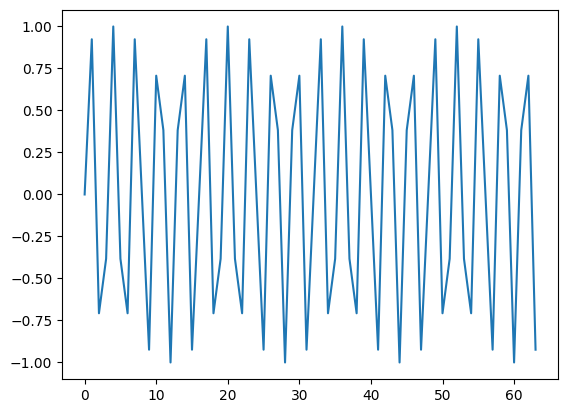

In [7]:
plt.plot(n,x)
plt.show()

In [8]:
X = np.fft.fft(x) #ДПФ

In [9]:
X_abs = np.abs(X) / (N/2) #спектр частот

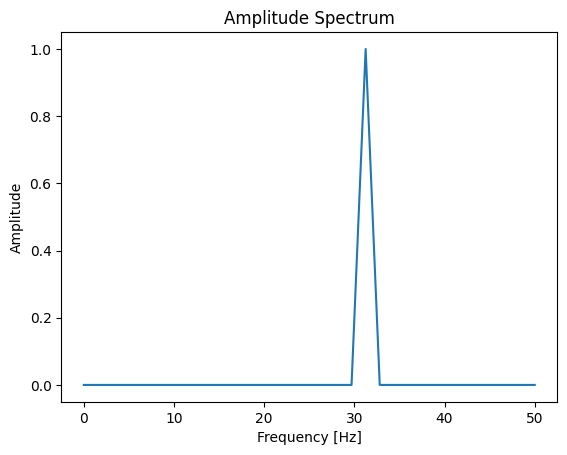

In [10]:
freq = np.arange(N/2 + 1) * fs / N
plt.plot(freq, X_abs[:N//2+1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()

## 2. Доповнити послідовність нульовими відліками до довжини 256 відліків. Обчислити 256-точече ДПФ. Побудувати графік амплітудного спектру. Порівняти його з графіком 64- точечного спектру.

In [11]:
x = np.sin(2 * np.pi * f_bin_20 * n / fs) #синусоїда
x = np.concatenate((x, np.zeros(new_N-N)))
n = np.arange(new_N)

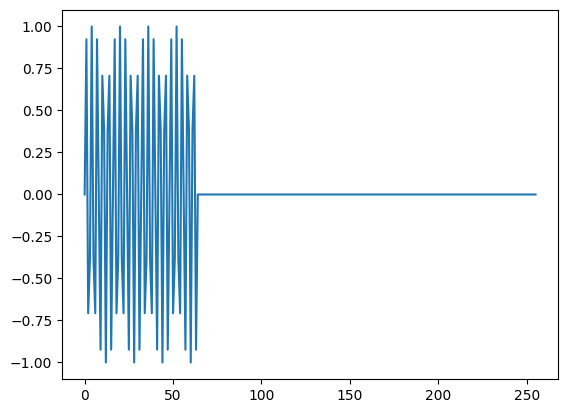

In [12]:
plt.plot(n, x)
plt.show()

In [13]:
X = np.fft.fft(x)

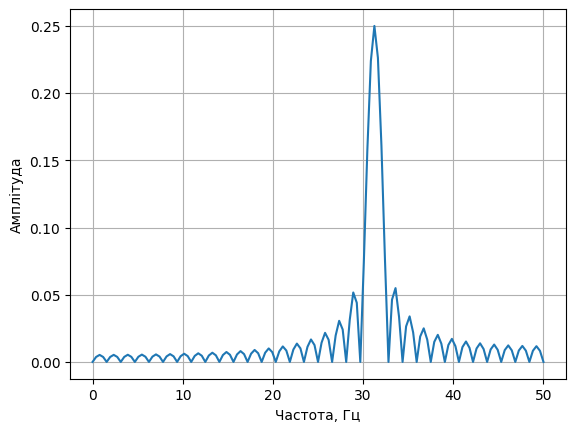

In [14]:
# Обчислення амплітудного спектру
amp_spec = np.abs(X) / (new_N / 2)

# Відображення графіка амплітудного спектру
freq = np.arange(new_N/2 + 1) * fs / new_N
plt.plot(freq, amp_spec[:new_N//2+1])
plt.xlabel('Частота, Гц')
plt.ylabel('Амплітуда')
plt.grid()
plt.show()

## 3. Повторити пп 1, 2 для синусоїди, частота якої відповідає 20.5 біна.

In [15]:
f_bin_20_5 = 20.5 * (fs/N) #частота 20 біна
print(f_bin_20_5)

32.03125


In [16]:
n = np.arange(N) #часові відліки синусоїди
x = np.sin(2 * np.pi * f_bin_20_5 * n / fs) #синусоїда

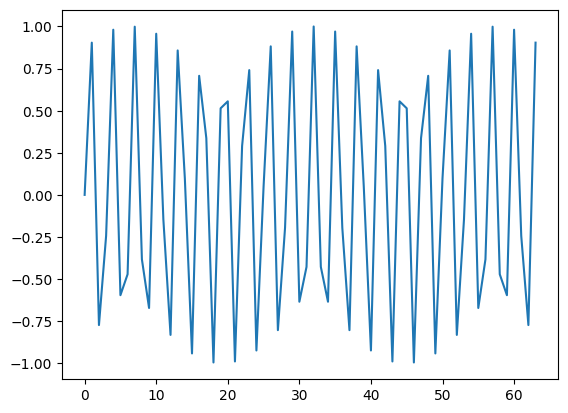

In [17]:
plt.plot(n, x)
plt.show()

In [18]:
X = np.fft.fft(x) #ДПФ

In [19]:
X_abs = np.abs(X) / (N/2) #спектр частот

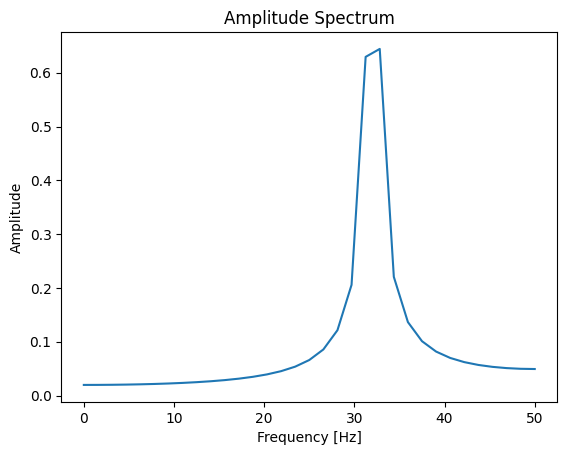

In [20]:
freq = np.arange(N/2 + 1) * fs / N
plt.plot(freq, X_abs[:N//2+1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()

In [21]:
x = np.sin(2 * np.pi * f_bin_20 * n / fs) #синусоїда
x = np.concatenate((x, np.zeros(new_N-N)))
n = np.arange(new_N)

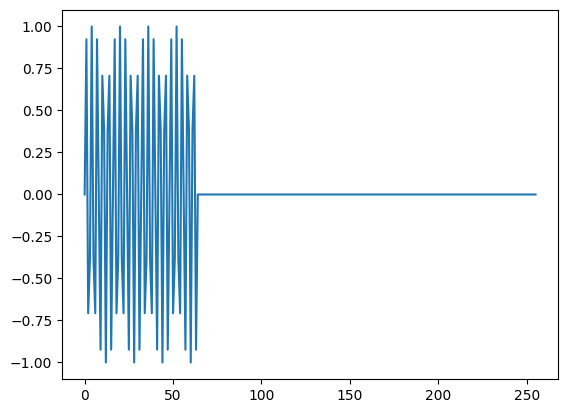

In [22]:
plt.plot(n, x)
plt.show()

In [23]:
X = np.fft.fft(x)

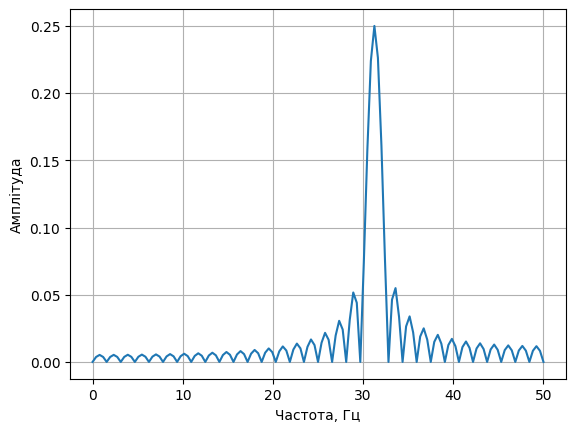

In [24]:
# Обчислення амплітудного спектру
amp_spec = np.abs(X) / (new_N / 2)

# Відображення графіка амплітудного спектру
freq = np.arange(new_N/2 + 1) * fs / new_N
plt.plot(freq, amp_spec[:new_N//2+1])
plt.xlabel('Частота, Гц')
plt.ylabel('Амплітуда')
plt.grid()
plt.show()

## 4. Сформувати послідовність довжиною 64 відліка цифрової синусоїди, частота якої дорівнює частоті 20-го біна 64-точечного ДПФ. Обчислити 64-точечне ДПФ. 

In [25]:
n = np.arange(N) #часові відліки синусоїди
x = np.sin(2 * np.pi * f_bin_20 * n / fs) #синусоїда

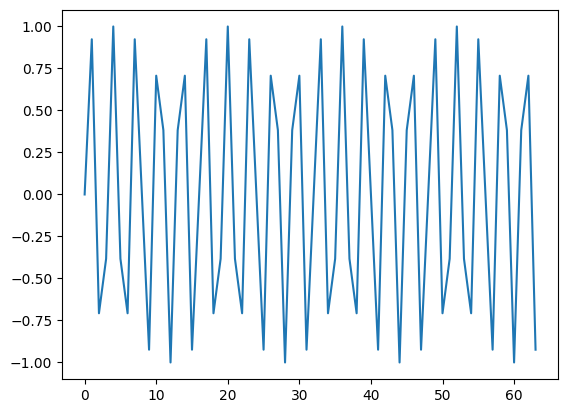

In [26]:
plt.plot(n,x)
plt.show()

In [27]:
X = np.fft.fft(x) #ДПФ

In [28]:
X_abs = np.abs(X) / (N/2) #спектр частот

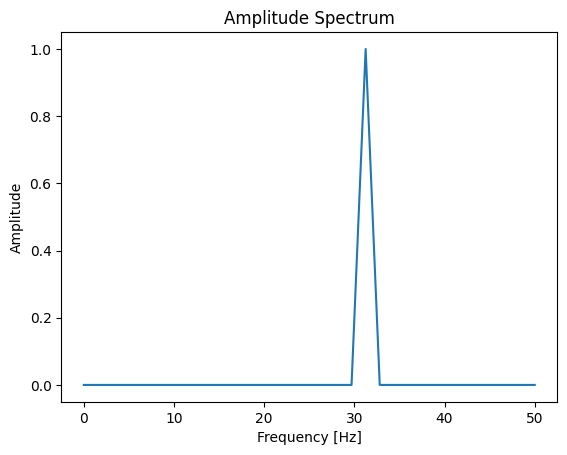

In [29]:
freq = np.arange(N/2 + 1) * fs / N
plt.plot(freq, X_abs[:N//2+1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()

## 5. Доповнити спектр нулями до довжини 256 відліків і обчислити зворотне ДПФ. Порівняти результат з початковою послідовністю.

In [30]:
X = np.concatenate((X, np.zeros(new_N-N)))

In [31]:
X_inverted = np.fft.ifft(X, new_N)

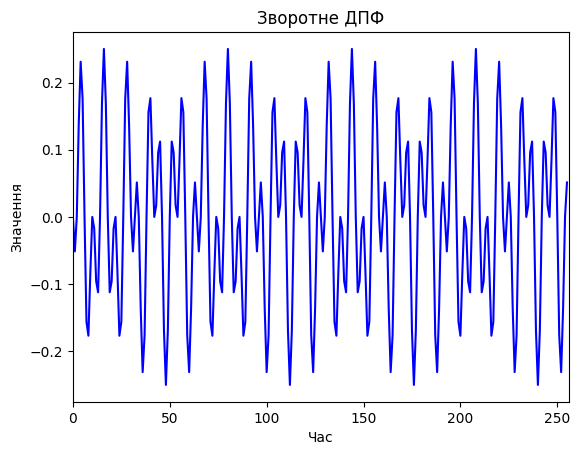

In [32]:
plt.plot(np.real(X_inverted), 'b')
plt.xlim(left=0, right=new_N)
plt.xlabel('Час')
plt.ylabel('Значення')
plt.title('Зворотне ДПФ')
plt.show()

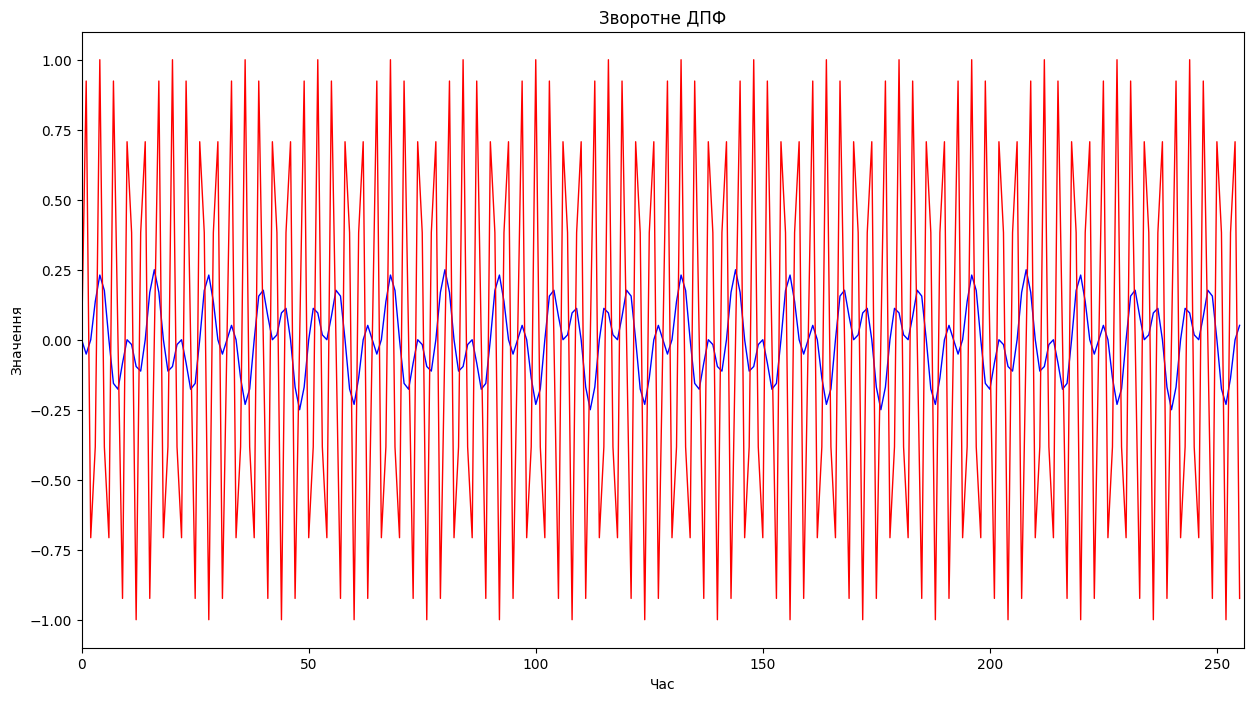

In [33]:
n = np.arange(new_N) #часові відліки синусоїди
x = np.sin(2 * np.pi * f_bin_20 * n / fs) #синусоїда
fig, ax = plt.subplots()
ax.figure.set_size_inches(15, 8)
ax.plot(n, X_inverted.real, 'b', linewidth = 1)
ax.plot(n, x, 'r', linewidth = 1)
ax.set_xlim(left=0, right=new_N)
ax.set_xlabel('Час')
ax.set_ylabel('Значення')
ax.set_title('Зворотне ДПФ')
plt.show()

## 6. Повторити пп 4-5 для прямокутного і трикутного імпульсів довжиною 30 відліків.

### Прямокутний сигнал

In [34]:
N = 30

In [35]:
f0 = 20
period = fs // f0
n = np.arange(N)
x = square(2 * np.pi / period * n)

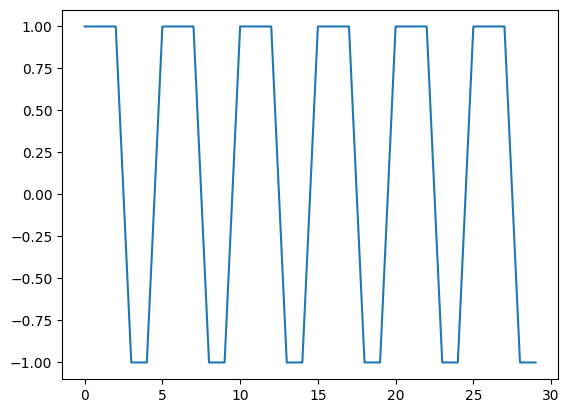

In [36]:
plt.plot(n, x)
plt.show()

In [37]:
X = np.fft.fft(x) #ДПФ

In [38]:
X_abs = np.abs(X) / (N/2) #спектр частот

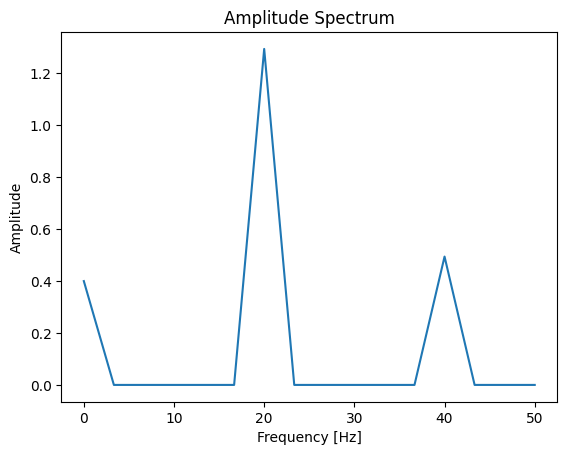

In [39]:
freq = np.arange(N/2 + 1) * fs / N
plt.plot(freq, X_abs[:N//2+1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()

In [40]:
X = np.concatenate((X, np.zeros(new_N-N)))

In [41]:
X_inverted = np.fft.ifft(X, new_N)

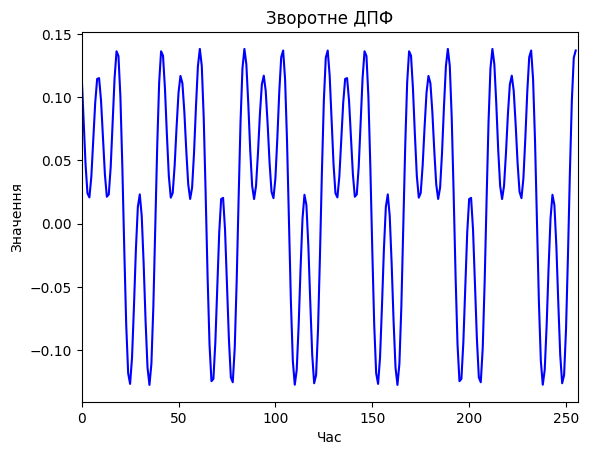

In [42]:
plt.plot(np.real(X_inverted), 'b')
plt.xlim(left=0, right=new_N)
plt.xlabel('Час')
plt.ylabel('Значення')
plt.title('Зворотне ДПФ')
plt.show()

### Трикутний сигнал

In [43]:
N = 30

In [44]:
f_bin_20 = 20 * fs / N

In [45]:
print(f_bin_20)

66.66666666666667


In [47]:
n = np.arange(N) / fs
x = signal.sawtooth(2 * np.pi * f_bin_20 * n)

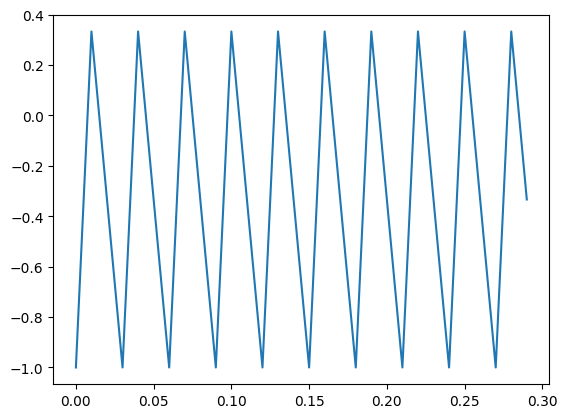

In [48]:
plt.plot(n, x)
plt.show()

In [49]:
X = np.fft.fft(x) #ДПФ

In [50]:
X_abs = np.abs(X) / (N/2) #спектр частот

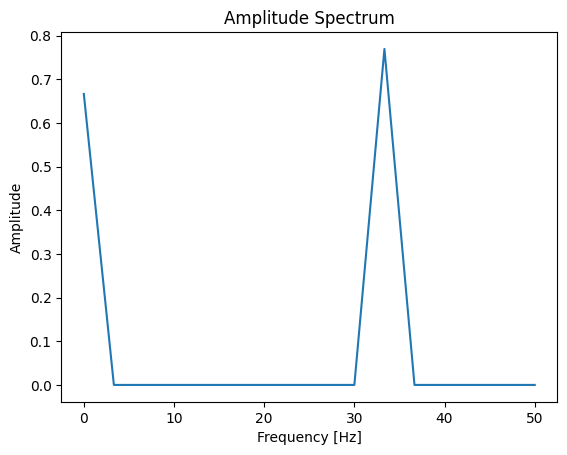

In [51]:
freq = np.arange(N/2 + 1) * fs / N
plt.plot(freq, X_abs[:N//2+1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()

In [52]:
X = np.concatenate((X, np.zeros(new_N-N)))

In [53]:
X_inverted = np.fft.ifft(X, new_N)

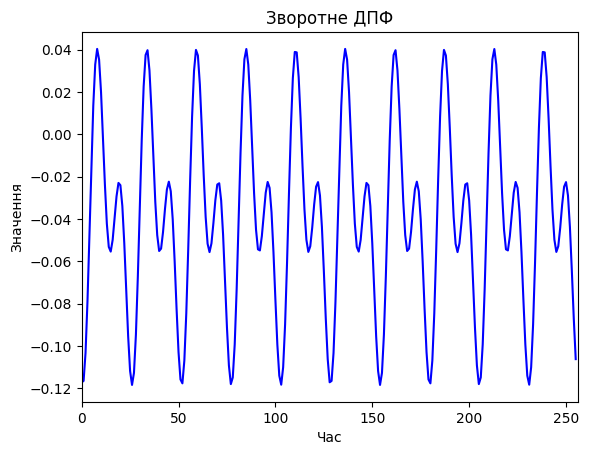

In [54]:
plt.plot(np.real(X_inverted), 'b')
plt.xlim(left=0, right=new_N)
plt.xlabel('Час')
plt.ylabel('Значення')
plt.title('Зворотне ДПФ')
plt.show()

## 7. Сформувати послідовність довжиною 64 відліки цифрової сінусоїди, частота якої дорівнює частоті 20-го біна 64-точечного ДПФ. Перетворити цю послідовність в комплексну послідовність половинної довжини. Обчислити ДПФ і відновити спектр початкової дійсної послідовності. Порівняти результат з результатом прямого обчислення 64-точечного ДПФ дійсної послідовності.

In [165]:
N = 64
f_bin_20 = 20 * (fs/N) #частота 20 біна

In [166]:
n = np.arange(N) #часові відліки синусоїди
x = np.sin(2 * np.pi * f_bin_20 * n / fs) #синусоїда

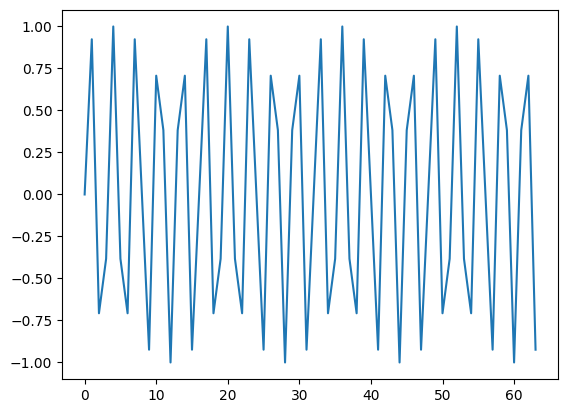

In [167]:
plt.plot(n,x)
plt.show()

In [168]:
x = x[:32]
Xhalf = np.fft.fft(x)
Xhalf = Xhalf / len(x)

In [169]:
X = np.fft.fft(Xhalf)

In [170]:
Xrestored = np.fft.ifft(X)

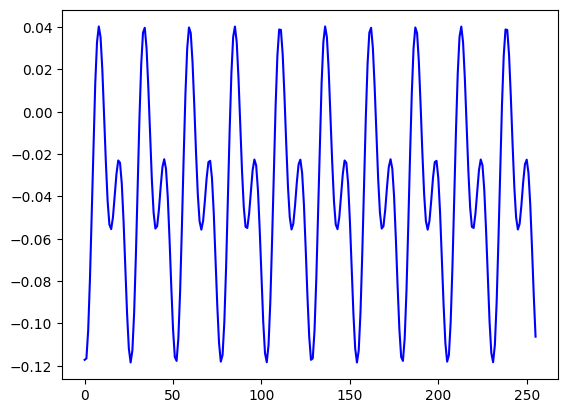

In [171]:
plt.plot(np.real(X_inverted), 'b')
plt.show()

## 8. Сформувати дві дійсні послідовності однакової довжини і обчислити їх ДПФ.

In [172]:
n = np.arange(N) #часові відліки синусоїди
f_bin_20 = 20 * (fs/N) #частота 20 біна
f_bin_40 = 40 * (fs/N) #частота 20 біна

x1 = np.sin(2 * np.pi * f_bin_20 * n / fs) #1 синусоїда
x2 = np.sin(2 * np.pi * f_bin_40 * n / fs) #2 синусоїда

In [173]:
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)

In [174]:
X1_abs = np.abs(X1) / (N/2) #спектр частот
X2_abs = np.abs(X2) / (N/2) #спектр частот

## 9. Сформувати з двох дійсних послідовностей (п.8) комплексну послідовність такої ж довжини. Обчислити ДПФ комплексної послідовності і відновити спектри дійсних послідовностей. Порівняти результати з результатами, отриманими в п.8.

In [175]:
x = x1 + 1j * x2

In [176]:
X = np.fft.fft(x)

In [177]:
Y1 = 0.5 * (X.real + X.imag) # ДПФ першої послідовності
Y2 = 0.5 * (X.real - X.imag) # ДПФ другої послідовності

In [178]:
Y1_abs = np.abs(Y1) / (N/2) #спектр частот
Y2_abs = np.abs(Y2) / (N/2) #спектр частот

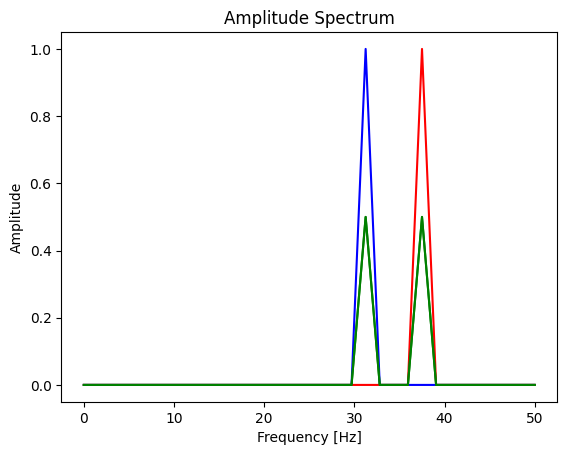

In [182]:
freq = np.arange(N/2 + 1) * fs / N
plt.plot(freq, X1_abs[:N//2+1], "b")
plt.plot(freq, X2_abs[:N//2+1], "r")
plt.plot(freq, Y1_abs[:N//2+1], "g")
plt.plot(freq, Y2_abs[:N//2+1], "green")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()

## 10. 10. Обчислити 5 відліків спектру (біни 18, 19, 20, 21, 22) послідовності з п.1, використовуючи алгоритм Герцеля і  порівняти результат з результатом обчислення ДПФ.

In [155]:
N = 64 # кількість відліків
fs = 100 # частота дискретизації
f_bin_20 = 20 * (fs/N) # частота 20 біна 64-точечного ДПФ

In [156]:
n = np.arange(N) #часові відліки синусоїди
x = np.sin(2 * np.pi * f_bin_20 * n / fs) #синусоїда

In [157]:
X = np.fft.fft(x) # обчислюємо ДПФ повністю

In [159]:
M = 5 # кількість бінів
bins = np.array([18, 19, 20, 21, 22]) # номери бінів
w = np.exp(-2j * np.pi * bins / N) # вагові коефіцієнти
Y = np.zeros(M, dtype=complex) # масив для збереження результатів
for m in range(M):
    Y[m] = np.sum(x * w[m]**n)

In [160]:
print("Результат обчислення ДПФ (біни 18-22):")
print(X[bins])
print("Результат обчислення алгоритмом Герцеля (біни 18-22):")
print(Y)

Результат обчислення ДПФ (біни 18-22):
[ 2.17656876e-14+1.65259033e-14j  2.51182325e-14+7.39697800e-14j
 -2.18761556e-13-3.20000000e+01j  2.41237745e-14-7.37896895e-14j
  3.12616069e-14-3.59822638e-14j]
Результат обчислення алгоритмом Герцеля (біни 18-22):
[ 2.89768209e-14+6.82787160e-15j  1.18238752e-14-1.12965193e-14j
 -2.19705246e-13-3.20000000e+01j  4.36317649e-14-6.90419943e-14j
  1.69864123e-14+1.45994328e-14j]


In [164]:
print(abs(X[bins]-Y))

[1.20852085e-14 8.62964758e-14 5.68512517e-14 2.00774076e-14
 5.25574849e-14]
